## Clustering Project

### Imports

In [1]:
import sys 
sys.path.append('./py_files')
from helper_funcs import load_dataset
from helper_funcs import get_cat_num_col_stats

from scipy.io.arff import loadarff
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import tqdm
from tqdm import tqdm
pd.options.display.float_format = '{:,.2f}'.format
PATH_TO_DATA = './datasets'

FILE_NAME = 'iris.arff'


# To do: 
## -> Load the dataset 
## -> Look at nan values, look at the data types. 
## ->
## ->
## ->
# Step 0 -  Find all the datasets and their datatypes

In [42]:
cat_num_df = get_cat_num_col_stats(PATH=PATH_TO_DATA,graph='no')

100%|██████████| 37/37 [00:06<00:00,  5.78it/s]


There are 37 datasets in ./datasets.             
Total Numerical Columns: 371.0 -- 45%.             
Total Categorical Columns: 451.0 -- 55%


In [33]:
cat_num_df.head()

,dataset,object_columns,float64_columns,pcnt_obj,Type,Total_cols,label
0,colic.arff,16.00,7.00,69.57,Categorical,23.00,Mostly Categorical
1,vote.arff,17.00,0.00,100.00,Categorical,17.00,Categorical
2,satimage.arff,1.00,36.00,2.70,Numerical,37.00,Numerical
3,pima_diabetes.arff,1.00,8.00,11.11,Numerical,9.00,Mostly Numerical
4,primary-tumor.arff,18.00,0.00,100.00,Categorical,18.00,Categorical


# Step 1 - Load Data - SciPy

In [3]:
df1 = load_dataset(FILE_NAME)

## Step 2 - Finding nans and categorical columns

In [5]:
df1.head().dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

In [14]:
cat_cols = df1.select_dtypes(include='object')
num_cols = df1.select_dtypes(include='number')

In [27]:
print(df1.isna().sum())

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64


# EDA

In [5]:
df1.dtypes.index[0]

'sepallength'

In [6]:
# we can look at the description of the dataset 
df1.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [7]:
#looking for empty values or NaNs
assert df1.isnull().sum().all() == df1.isna().sum().all()
print("No missing values")

No missing values


In [8]:
#let's look at the different classes - count
df1.groupby('class').count()

,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [9]:
#let's look at the different classes -  mean
df1.groupby('class').mean()

,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,5.01,3.42,1.46,0.24
Iris-versicolor,5.94,2.77,4.26,1.33
Iris-virginica,6.59,2.97,5.55,2.03


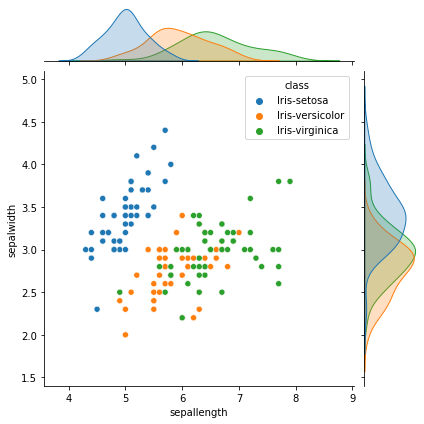

In [10]:
# we can also see a graphical difference between them
sns.jointplot(data=df1, x='sepallength',y='sepalwidth',hue='class');

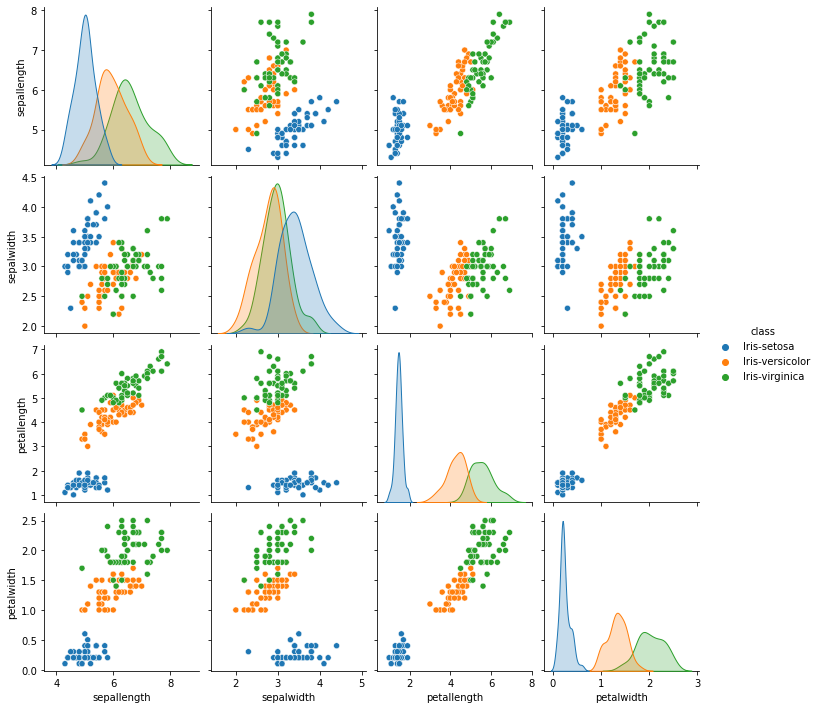

In [11]:
sns.pairplot(df1, hue='class');

# Preprocessing 

In [12]:
# sepparating the dataframe into numerical and categorical
df_num = df1.copy().drop('class',axis=1)
df_cat = df1['class'].copy()


## Categorical Preprocessing - OHE & LE

In [13]:
from helper_funcs import get_ohe_df, get_le_df

In [14]:
df_cat_ohe = get_ohe_df(df1, 'class')
df_cat_le = get_le_df(df1, 'class')

In [15]:
df_cat_le.head()

,le_class
0,0
1,0
2,0
3,0
4,0


In [16]:
df_cat_ohe.head()

,x0_Iris-setosa,x0_Iris-versicolor,x0_Iris-virginica
0,1.00,0.00,0.00
1,1.00,0.00,0.00
2,1.00,0.00,0.00
3,1.00,0.00,0.00
4,1.00,0.00,0.00


## Numerical Preprocessing

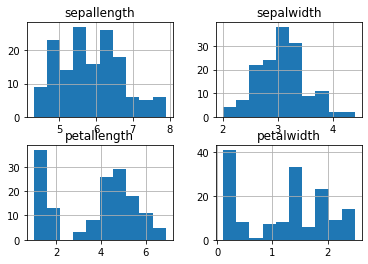

In [17]:
df_num.hist();

In [18]:
## Data
#numerical columns only
df_num = df1.copy().drop('class',axis=1)
#
data = df_num.values

In [19]:
### Standard Scaler - removing the mean and scaling to unit variance.
###  z = (x - u) / s
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Scaling
st_scaler = StandardScaler()
st_scaled = st_scaler.fit_transform(data)

#df out of it 
df_st_scaled = pd.DataFrame(st_scaled,columns=df_num.columns)

#adding the class column
df_st_scaled['class'] = df_cat.values

#checking
#df_st_scaled.describe()

## MinMaxScaler
# Transform features by scaling each feature to a given range.
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
from sklearn.preprocessing import MinMaxScaler
#instantiating
min_max = MinMaxScaler()
#fit_transform
mm_scaled = min_max.fit_transform(data)
#df
df_mm_scaled = pd.DataFrame(mm_scaled,columns=df_num.columns)
#adding class column
df_mm_scaled['class'] = df_cat.values
#checking
#df_mm_scaled.describe()

## MaxAbsScaler
# data lies within the range [-1, 1]
from sklearn.preprocessing import MaxAbsScaler
#instantiating
max_abs = MinMaxScaler()
#fit_transform
mabs_scaled = max_abs.fit_transform(data)
#df
df_mabs_scaled = pd.DataFrame(mabs_scaled,columns=df_num.columns)
# adding class column
df_mabs_scaled['class'] = df_cat.values

#checking
#df_mabs_scaled.describe()



/Users/Eric/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
/Users/Eric/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


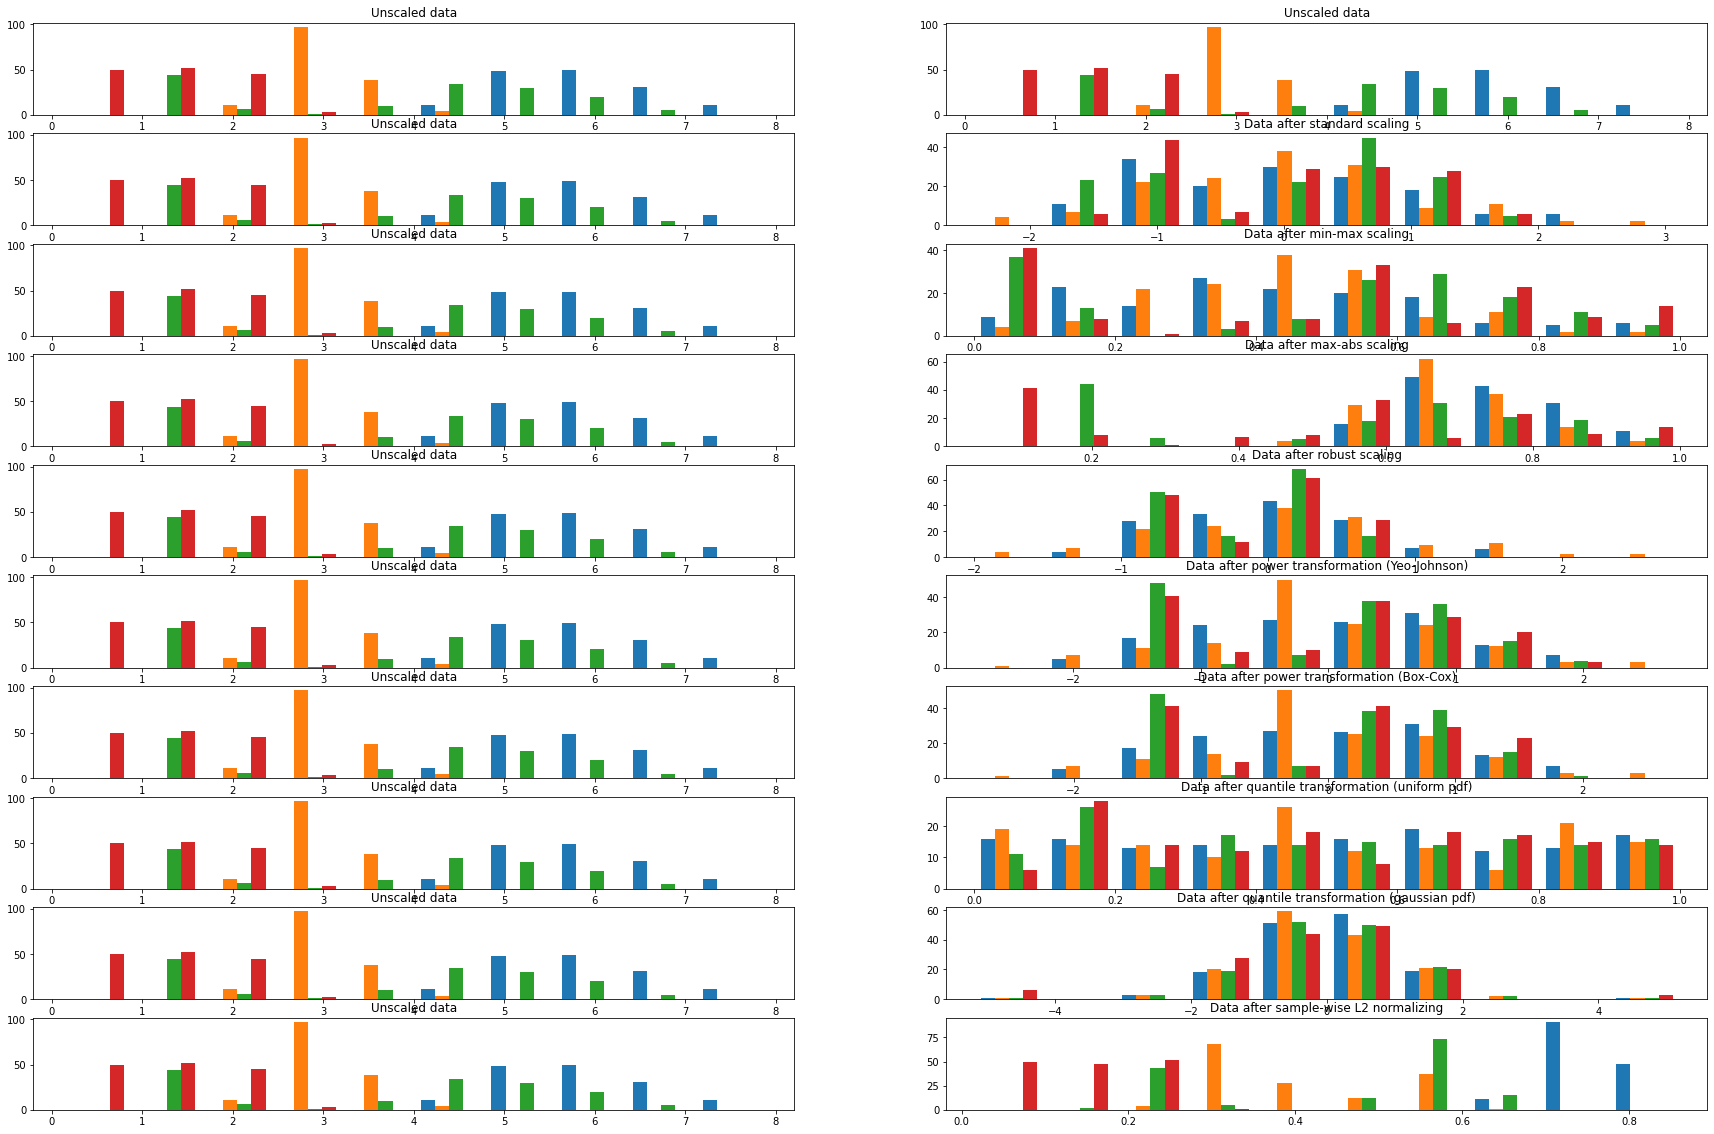

In [20]:
from helper_funcs import num_col_standardize
import matplotlib.pyplot as plt
num_standardized = num_col_standardize(df1,graph='n')

In [131]:
all_col_dtypes=dict()
for idx,x in enumerate(dfs):
    fn = files[idx].split(".")[0]
    all_col_dtype[fn] = x
    all_col_dtypes.update(dict(x.dtypes))

In [ ]:
    fn = files[idx].split(".")[0]
    all_col_dtype[fn] = x
    all_col_dtypes.update(dict(x.dtypes))

In [85]:
zp = list(zip(dfs[0].isna().sum()[dfs[0].isna().sum() > 0],
    dfs[0].isna().sum()[dfs[0].isna().sum()>0].index))

zp

[(69, 'rectal_temperature'),
 (26, 'pulse'),
 (71, 'respiratory_rate'),
 (299, 'nasogastric_reflux_PH'),
 (37, 'packed_cell_volume'),
 (43, 'total_protein'),
 (235, 'abdomcentesis_total_protein')]

In [123]:
dict(dfs[0].isna().sum()[dfs[0].isna().sum() > 0])

{'rectal_temperature': 69,
 'pulse': 26,
 'respiratory_rate': 71,
 'nasogastric_reflux_PH': 299,
 'packed_cell_volume': 37,
 'total_protein': 43,
 'abdomcentesis_total_protein': 235}

In [121]:
list(dfs[0].isna().sum()[dfs[0].isna().sum() > 0].index)

['rectal_temperature',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_PH',
 'packed_cell_volume',
 'total_protein',
 'abdomcentesis_total_protein']

In [120]:
list(dfs[0].isna().sum()[dfs[0].isna().sum() > 0])

[69, 26, 71, 299, 37, 43, 235]

In [118]:
def get_nan_cols(x):
    return list(x.isna().sum()[x.isna().sum() > 0].index)
def get_nan_count_dict(x):
    return dict(x.isna().sum()[x.isna().sum() > 0])
def get_col_dtype(df,col_name):
    return df[col_name].dtype

col_with_nans = list(dfs[0].isna().sum()[dfs[0].isna().sum() > 0].index)
count_nans_dict = dict(dfs[0].isna().sum()[dfs[0].isna().sum() > 0])
col_with_nans
#for x in col_with_nans:
    #print(dfs[0][x].dtype)

d = dict()
l=[]
for idx,df in enumerate(dfs): 
    nan_cols = l.append(get_nan_cols(df))
    name = files[idx]

True

In [ ]:
datasets = os.listdir('./datasets/')
# dictionary to store values
cat_num_dict = dict()
cat_col_dict = dict()
for file in tqdm(datasets):
    file_name = PATH + "/" + file
    df = load_dataset(file_name)
    
    tmp = dict(df.dtypes.value_counts())

In [104]:
yy = list(dfs[0].isna().sum()[dfs[0].isna().sum() > 0].index)
[dfs[0][x].dtype for x in yy]

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')]

In [108]:

nan_cols_all = list(map(lambda x: get_nan_cols(x),dfs))

nan_cols_all
lk = sum(ks,[])
print(lk)

['rectal_temperature', 'pulse', 'respiratory_rate', 'nasogastric_reflux_PH', 'packed_cell_volume', 'total_protein', 'abdomcentesis_total_protein', 'ca', 'trestbps', 'chol', 'thalach', 'ca', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price', 'Bare_Nuclei', 'A2', 'A14', 'duration', 'wage-increase-first-year', 'wage-increase-second-year', 'wage-increase-third-year', 'working-hours', 'standby-pay', 'shift-differential', 'statutory-holidays', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']


In [ ]:
list(map(lambda x: , daaa))

In [55]:
d = {
    "dataset_name":df,
    'Number of Cat Cols':x
    'Number of Num cols':y
    'Nan_columns':[(col_name,count_nans)]
    
    
    
    
    
}

{'rectal_temperature': 69,
 'pulse': 26,
 'respiratory_rate': 71,
 'nasogastric_reflux_PH': 299,
 'packed_cell_volume': 37,
 'total_protein': 43,
 'abdomcentesis_total_protein': 235}

In [30]:
PATH_TO_DATA

'./datasets'

In [69]:
def get_col_type_nans(PATH):
    cat_nans_cols = []
    for files in os.listdir(PATH):
        #list of files
        file_name.append(files)
        # loading the dataset
        df = load_dataset(PATH + '/' + files)
        
        size_cols = len(df.columns)
        for cols in df.columns:
            col_type = df[cols].dtype
            col_isna = df[cols].isnull().sum()
            pcnt_of_df = ((1/size_cols)*100)
            final_tup = (files,cols,col_type,col_isna,pcnt_of_df)
            cat_nans_cols.append(final_tup)
    columns = ['dataset','col','type','nans','pcnt_of_df']
    df = pd.DataFrame(cat_nans_cols,columns=columns)

    return df

In [67]:
#new merged_list tuples



In [70]:
df = get_col_type_nans(PATH_TO_DATA)

,dataset,col,type,nans,pcnt_of_df
0,colic.arff,surgery,object,0,4.35
1,colic.arff,Age,object,0,4.35
2,colic.arff,rectal_temperature,float64,69,4.35
3,colic.arff,pulse,float64,26,4.35
4,colic.arff,respiratory_rate,float64,71,4.35


In [77]:
import sys 
sys.path.append('./py_files')
from helper_funcs import *
from helper_funcs import load_dataset
from helper_funcs import get_cat_num_col_stats
from helper_funcs import get_ohe_df, get_le_df
from helper_funcs import num_col_standardize


from scipy.io.arff import loadarff
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import tqdm
from tqdm import tqdm
pd.options.display.float_format = '{:,.2f}'.format



#load dataset 
#check data -> nans, dtypes, distribution, counts per class, etc..
#check nans
#separate categorical from numerical 
#Preprocessing: Categorical Numerical 
#OPTICS: distance metrics 
#K-Means 
#K-Modes/K-Medoids/K-Prototypes
#Fuzzy Clustering - Fuzzy C-Means (FCM) / Possibilistic C-Means (PCM)
#Analyze / Evaluate 
#Note metrics to evaluate 


# single file first
PATH_TO_DATA = './datasets'
FILE_NAME = 'iris.arff'
FULL_PATH = PATH_TO_DATA + '/' + FILE_NAME

# qcut of all the dataframes dtypes count - Categorical Vs. Numerical
cat_num_df = get_cat_num_col_stats(PATH=PATH_TO_DATA,graph='no')
col_type_nans = get_col_type_nans(PATH=PATH_TO_DATA)
# Loading dataset 
df1 = load_dataset(FULL_PATH)

# sepparating the dataframe into numerical and categorical
df_num = df1.copy().drop('class',axis=1)
df_cat = df1['class'].copy()

#ohe & le
df_cat_ohe = get_ohe_df(df1, 'class')
df_cat_le = get_le_df(df1, 'class')

#standardize numerical cols
num_standardized = num_col_standardize(df1,graph='n')





100%|██████████| 37/37 [00:06<00:00,  5.82it/s]



There are 37 datasets in ./datasets.             
Total Numerical Columns: 371.0 -- 45%.             
Total Categorical Columns: 451.0 -- 55%


/Users/Eric/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
/Users/Eric/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [82]:
[x[0] for x in num_standardized]

['Unscaled data',
 'Data after standard scaling',
 'Data after min-max scaling',
 'Data after max-abs scaling',
 'Data after robust scaling',
 'Data after power transformation (Yeo-Johnson)',
 'Data after power transformation (Box-Cox)',
 'Data after quantile transformation (uniform pdf)',
 'Data after quantile transformation (gaussian pdf)',
 'Data after sample-wise L2 normalizing']

In [83]:
d=dict(num_standardized)

In [86]:
d.keys()

dict_keys(['Unscaled data', 'Data after standard scaling', 'Data after min-max scaling', 'Data after max-abs scaling', 'Data after robust scaling', 'Data after power transformation (Yeo-Johnson)', 'Data after power transformation (Box-Cox)', 'Data after quantile transformation (uniform pdf)', 'Data after quantile transformation (gaussian pdf)', 'Data after sample-wise L2 normalizing'])